In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from MTGA.MTGA import *

from MTGA.MTGAInstance import Instance
import MTGA.Generators as Generators
import MTGA.Mutators as Mutators
import MTGA.WeightGenerators as WeightGenerators
import Fixers as Fixers
import Evaluators as Evaluators

from MTGA.GeneVisualizer import GeneEvolutionRenderer
from Displayer import Displayer

from Utils import *


## Main Instance

In [12]:
instance = Instance("problems/p4.json",
    evaluator=Evaluators.CummulativeEvaluator(),
    mutator=Mutators.WalkMutator(),
    generator=Generators.Generator(),
    fixer=Fixers.ChoiceFixer(),
    weight_generator=WeightGenerators.SoftmaxWeights())

In [13]:
displayer = Displayer()
gene_displayer = GeneEvolutionRenderer()

## The Run

In [14]:
data = optimize_and_collect(instance)

[2025-02-02 22:07:09][  0]     0.04385972     0.04385281 { 12.00000000  21.36200000  42.00000000   8.62710589}
[2025-02-02 22:07:09][  1]     0.08271360     0.03539252 { 12.00000000  27.29400000  42.00000000  11.43886201}
[2025-02-02 22:07:09][  2]     0.12155366     0.03715706 { 12.00000000  33.16800000  42.00000000  11.12635502}
[2025-02-02 22:07:09][  3]     0.15452337     0.02901125 { 12.00000000  35.82200000  42.00000000  10.38452291}
[2025-02-02 22:07:09][  4]     0.18039298     0.02488852 { 12.00000000  36.24600000  42.00000000   9.91087706}
[2025-02-02 22:07:09][  5]     0.21877480     0.03726077 { 12.00000000  37.00800000  42.00000000   9.51839987}
[2025-02-02 22:07:09][  6]     0.25151348     0.03043866 { 16.00000000  37.31400000  42.00000000   9.07608969}
[2025-02-02 22:07:09][  7]     0.28677607     0.03395987 { 16.00000000  37.53000000  42.00000000   8.79733482}
[2025-02-02 22:07:09][  8]     0.32284141     0.03498363 { 16.00000000  38.29200000  42.00000000   8.16913312}
[

In [15]:
evaluator = Evaluators.MainEvaluator()
solutions = [ (np.where(bool_array)[0].tolist(), evaluator(instance.problem, bool_array)) for bool_array, value in instance.solutions ]

## Results

In [16]:
best_solution, best_solutions_value = max(solutions, key=lambda x: x[1])
print(f"Best solution [{best_solutions_value}]:\n{best_solution}")

Best solution [4]:
[4]


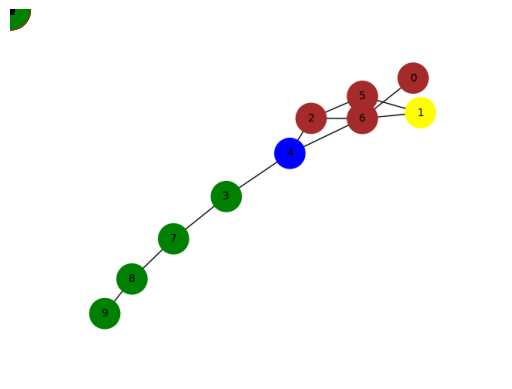

In [17]:
instance.problem.visualize_fire(displayer, best_solution)

In [ ]:
instance.problem.visualize_fires(displayer, solutions)

In [ ]:
gene_displayer.visualize(data)